In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import linalg as sla

def photonic1D(xmin, xmax, Nx, Vfun, neigs):   
    x = np.linspace(xmin, xmax, Nx)  # x axis grid
    dx = x[1] - x[0]  # x axis step size    # Obtain the potential function values:
    V = Vfun  # create the Hamiltonian Operator matrix:
   
    H = sparse.eye(Nx, Nx, format='lil') * (-2)    # implement the numerical derivative
    e=sparse.eye(Nx, Nx, format='lil')   # implement the numerical derivative
        
    for i in range(Nx - 1):
        H[i, i + 1] =  1
        H[i + 1, i] = 1
        e[i,i]*=V[i]**-1
    
    H = e@H/ (dx ** 2)

       # convert to csc sparse matrix format:
    H = H.tocsc()    # obtain neigs solutions from the sparse matrix:
    [evl, evt] = sla.eigs(H, k=neigs, which='SM')
    for i in range(neigs):
        # normalize the eigenvectors:
        evt[:, i] = evt[:, i] / np.sqrt(
                                np.trapz(np.conj(
                                evt[:,i])*evt[:,i],x))
        # eigen values MUST be real:
        evl = np.abs(np.real(evl))
     
    return evl, evt, x

In [2]:
def eval_eigenfunc(xmin, xmax, Nx, Vfun, neigs):
    # call the 1D :
    H = photonic1D(xmin, xmax, Nx, Vfun, neigs)
    evl = H[0] # energy eigenvalues
    indices = np.argsort(evl)   
    evt = H[1] # eigenvectors 
    x = H[2] # x grid 
    i = 0
    plt.figure(figsize=(20,15))
    while i < neigs:
        n = indices[i]
        # obtain probabilities from wave functions
        y = np.real(np.conj(evt[:, n]) * evt[:, n]) 
        print(evl[n])
        #y = np.angle( evt[:, n])

        plt.subplot(neigs, 1, i+1)  
        plt.plot(x, y)
        plt.plot(x, Vfun/max(Vfun)*max(y))
        plt.axis('off')
        i = i + 1  
    
    plt.show()
    return evl,evt
    

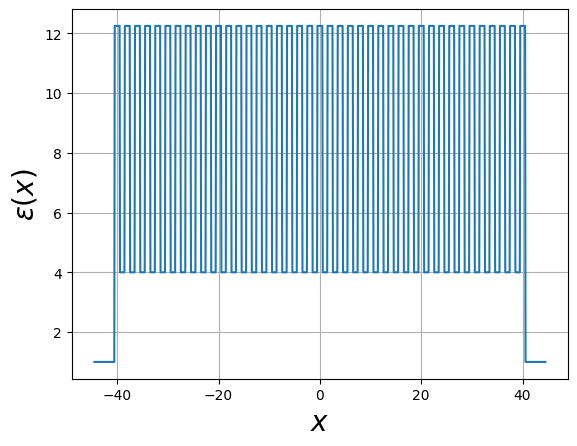

In [46]:
nx = 1024 # number of sampling points of a single unit cell
length_aire=4
er2=4  # Dielectric value 2
er1=12.25  # Dielectric value 1
d=1
aa=1 # tamaño de un rectangulo
L=40+aa/2#  half of the total len of the lattic
ML=int(nx)
Mrest=int(nx)

def periodicf(lid,lfd,f,x):

    
    if x>=lid and x<=lfd :
        return er1
    if ((x>=lfd and x<=(lfd+2*aa)) or (x<=lid and x>=(lid-2*aa))) :
        return f(x)
    if abs(x)>L:
        return 1
    elif x>(lfd+2*aa):
        x_new=x-(2*aa)
        return periodicf(li,lf,f,x_new)
    elif x<(lid-2*aa):
        x_new=x+(2*aa)
        return periodicf(li,lf,f,x_new)
    
    
def squareP(li,lf,x):
    return periodicf(li,lf,square,x)
 
# Non-periodic square wave function defined for a range [-l,l]
def square(x):
    if abs(x)>(lf+aa):
        return er1
    else:
        return er2

li = -d/2
lf = d/2
lon=1
x_cell =np.linspace(-L-length_aire,L+length_aire,ML) # spatial sampling # sampling points in the unit cel
e_cell = [squareP(li,lf,xi) for xi in x_cell]#Dielectric function

def sho_wavefunctions_plot(xmin = -L-length_aire, xmax = L+length_aire, Nx = nx, 
                           neigs = 20):
    
    Vfun=np.array(e_cell)
    
    evt = eval_eigenfunc(xmin, xmax, Nx, Vfun,neigs)
    return evt

plt.plot(x_cell,e_cell)
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$\epsilon(x)$',fontsize=20)
plt.grid()

0.00014958032157151243
0.0005997470585141092
0.0013544451437908344
0.002419289645074472
0.003800540442040415
0.005504221697334914
0.007535547401160699
0.00989865240686038
0.012596542665849187
0.015631165792414345
0.01900352700729496
0.022713805721815295
0.026761451081587034
0.031145248560174445
0.03586335640951705
0.040913313208486554
0.0462920179069613
0.051995682818310476
0.05801975853321148
0.06435882792428763


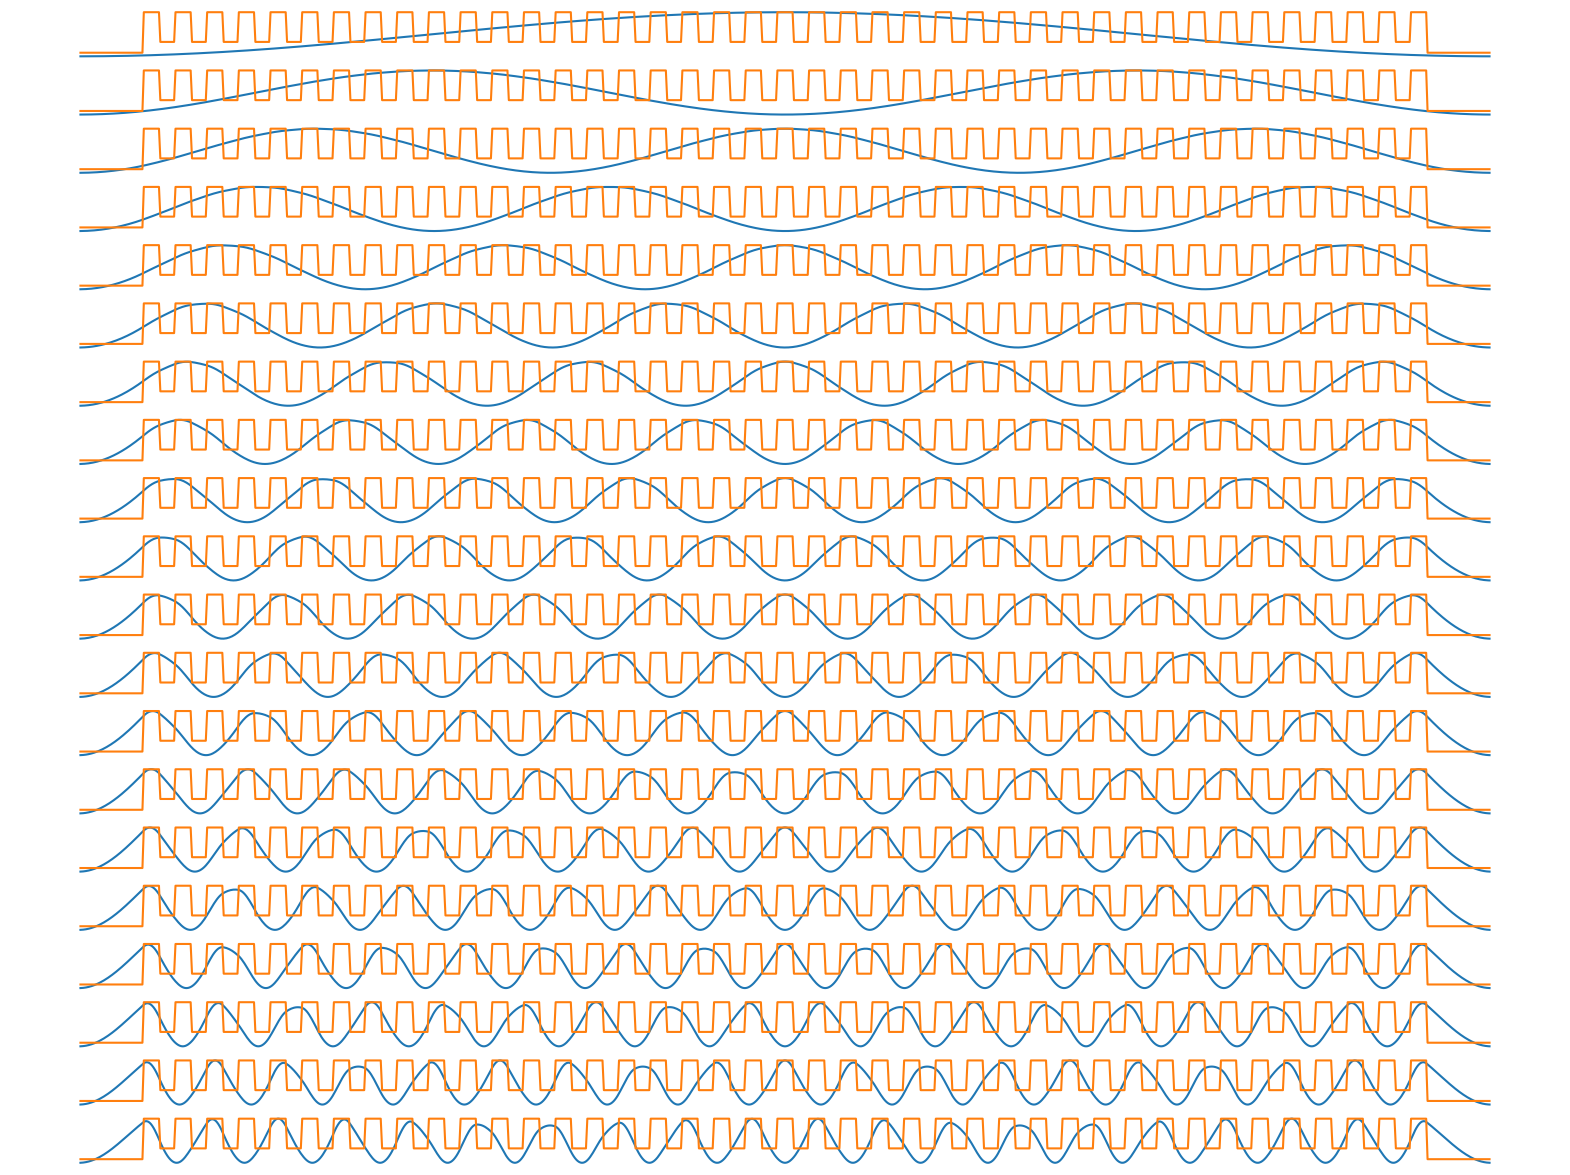

(array([0.00014958, 0.00059975, 0.00135445, 0.00241929, 0.00380054,
        0.00550422, 0.00753555, 0.00989865, 0.01259654, 0.01563117,
        0.01900353, 0.02271381, 0.02676145, 0.03114525, 0.03586336,
        0.04091331, 0.04629202, 0.05199568, 0.05801976, 0.06435883]),
 array([[-0.00045581+0.j,  0.00089321+0.j, -0.00129736+0.j, ...,
          0.00374394+0.j,  0.00381622+0.j,  0.00388681+0.j],
        [-0.00091162+0.j,  0.00178643+0.j, -0.0025947 +0.j, ...,
          0.00748641+0.j,  0.00763077+0.j,  0.00777172+0.j],
        [-0.00136743+0.j,  0.00267963+0.j, -0.00389202+0.j, ...,
          0.01122593+0.j,  0.01144196+0.j,  0.01165284+0.j],
        ...,
        [-0.00136743+0.j, -0.00267963+0.j, -0.00389202+0.j, ...,
         -0.01122593+0.j,  0.01144196+0.j, -0.01165284+0.j],
        [-0.00091162+0.j, -0.00178643+0.j, -0.0025947 +0.j, ...,
         -0.00748641+0.j,  0.00763077+0.j, -0.00777172+0.j],
        [-0.00045581+0.j, -0.00089321+0.j, -0.00129736+0.j, ...,
         -0.003743

In [47]:
sho_wavefunctions_plot()

In [58]:
evv,ev,x=photonic1D(min(x_cell), max(x_cell), nx, np.array(e_cell),10)


In [48]:
def photonic1D_bloch(xmin, xmax, Nx, Vfun, neigs,k,ax):   
    x = np.linspace(xmin, xmax, Nx)  # x axis grid
    dx = x[1] - x[0]  # x axis step size    # Obtain the potential function values:
    V = Vfun  # create the Hamiltonian Operator matrix:
   
    H = sparse.eye(Nx, Nx, format='lil') * (-2)    # implement the numerical derivative
    e=sparse.eye(Nx, Nx, format='lil')   # implement the numerical derivative
        
    for i in range(Nx - 1):
        H[i, i + 1] =  1
        H[i + 1, i] = 1
        e[i,i]*=V[i]**-1
    
    H[0, -1] =  np.exp(-1j*k*ax)
    H[-1, 0] =  np.exp(1j*k*ax)
    H = e@H/ (dx ** 2)

       # convert to csc sparse matrix format:
    H = H.tocsc()    # obtain neigs solutions from the sparse matrix:
    [evl, evt] = sla.eigs(H, k=neigs, which='SM')
    for i in range(neigs):
        # normalize the eigenvectors:
        evt[:, i] = evt[:, i] / np.sqrt(
                                np.trapz(np.conj(
                                evt[:,i])*evt[:,i],x))
        # eigen values MUST be real:
        evl = np.sqrt(np.abs(np.real(evl)))   
     
    return evl, evt, x


def eval_eigenfunc(xmin, xmax, Nx, Vfun, neigs,k,ax):
    # call the 1D :
    H = photonic1D_bloch(xmin, xmax, Nx, Vfun, neigs,k,ax)
    evl = H[0] # energy eigenvalues
    indices = np.argsort(evl)   
    evt = H[1] # eigenvectors 
    x = H[2] # x grid 
    i = 0
    plt.figure(figsize=(20,15))
    while i < neigs:
        n = indices[i]
        # obtain probabilities from wave functions
        y = np.real(np.conj(evt[:, n]) * evt[:, n]) 
        #y = np.angle( evt[:, n])

        plt.subplot(neigs, 1, i+1)  
        plt.plot(x, y)
        plt.plot(x, Vfun/max(Vfun)*max(y))
        plt.axis('off')
        i = i + 1  
    
    plt.show()
    
    return evl,evt

    

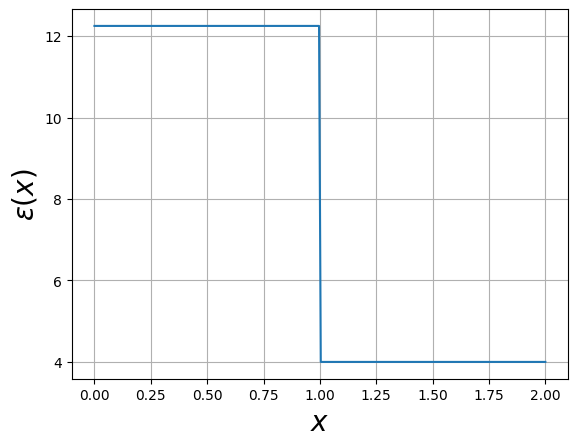

In [54]:
nx = 1048 # number of sampling points of a single unit cell
length_aire=0
er2=4  # Dielectric value 2
er1=12.25  # Dielectric value 1
d=1
aa=1 # tamaño de un rectangulo
L=aa*2#  half of the total len of the lattic
ML=int(nx/4)
Mrest=int(nx/2)*0

# Non-periodic square wave function defined for a range [-l,l]
def square(x):
    if abs(x)<(aa):
        return er1
    else:
        return er2
lf = d
lon=1
x_cell =np.linspace(0,L,ML) # spatial sampling # sampling points in the unit cell
e_cell = [square(xi) for xi in x_cell]
nx=len(x_cell)
plt.plot(x_cell,e_cell)
plt.xlabel('$x$',fontsize=20)
plt.ylabel('$\epsilon(x)$',fontsize=20)
plt.grid()

In [55]:
def sho_wavefunctions_plot(xmin = 0, xmax = L+length_aire, Nx = nx, 
                           neigs = 20,k=1,ax=2*aa):
    
    Vfun=np.array(e_cell)
    
    evt = eval_eigenfunc(xmin, xmax, Nx, Vfun,neigs,k,ax)
    return evt

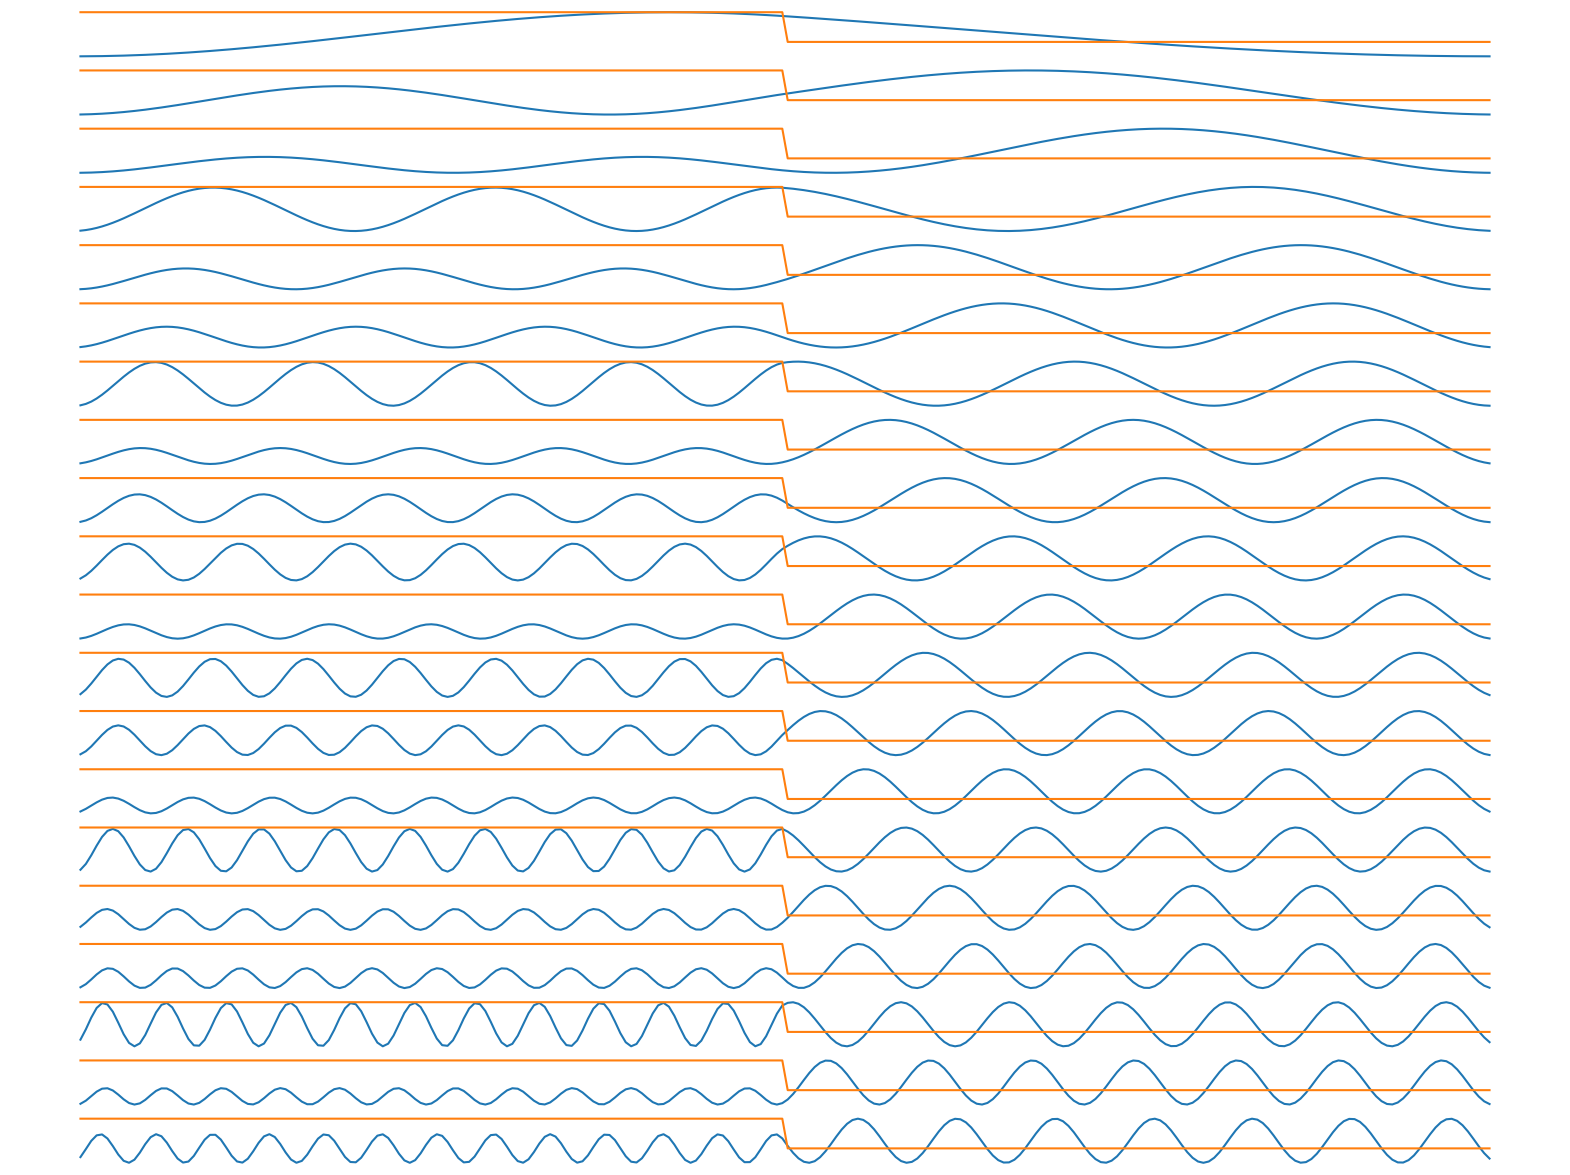

In [56]:
evt = sho_wavefunctions_plot()